#Chapter-3 Lab

###Loading data

In [139]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression 

In [140]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [141]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [142]:
boston_df = pd.DataFrame(np.c_[(boston_data.data, boston_data.target)] ,
                         columns = np.concatenate((boston_data.feature_names, ['MEDIAN_VALUE'] )))
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDIAN_VALUE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##Simple Linear Regression

In [143]:
#using sklearn Linear Regression and t scores , so I found another library stastmodels
# which also use the R style formulas
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [144]:
boston_df['intercept'] = np.ones(506)
lr = sm.OLS(endog = boston_df['MEDIAN_VALUE'], exog = boston_df[['LSTAT' , 'intercept']])
results = lr.fit()

In [145]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           MEDIAN_VALUE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           5.08e-88
Time:                        16:21:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT         -0.9500      0.039    -24.528      0.0

###Confidence Interval

In [146]:
results.conf_int()

,0,1
LSTAT,-1.026148,-0.873951
intercept,33.448457,35.659225


###Prediction Interval

In [147]:
predictions = results.get_prediction()
predictions.summary_frame(alpha=0.05).iloc[[5,10,15]]
# the mean_ci are confidence interval while the obs_ci's are prediction interval

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
5,29.604084,0.399336,28.819515,30.388652,17.366915,41.841253
10,15.125332,0.409341,14.321106,15.929557,2.886886,27.363777
15,26.506923,0.320323,25.877590,27.136256,14.278725,38.735121


###Plotting the regression line

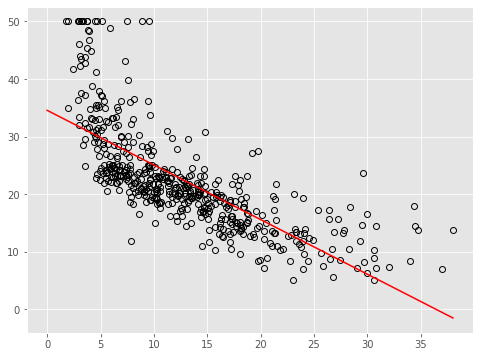

In [148]:
m = results.params[0]   #slope -- LSTAT
b = results.params[1]   #intercept

#used ggplot style and empty circles to make the plots look like the ones in R 
plt.style.use('ggplot')

plt.figure(figsize = [8,6])
plt.plot(boston_df['LSTAT'] , boston_df['MEDIAN_VALUE'], 'o' , color = 'black' ,  markerfacecolor = 'none')

x = np.linspace(0,38,100)
plt.plot(x , m*x  + b ,color = 'red')
plt.show()

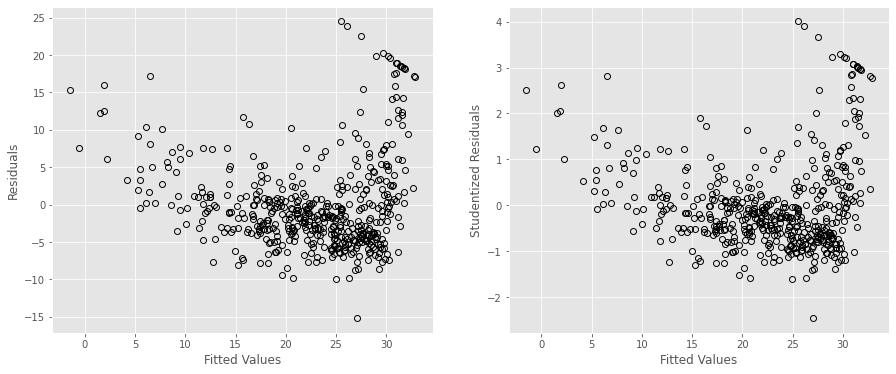

In [149]:
predict = results.fittedvalues

residuals = results.resid
student_resid = results.outlier_test().loc[:,'student_resid']
fig ,(ax1,ax2) = plt.subplots(1,2, figsize = [15,6])

ax1.plot(predict , residuals , 'o' ,color = 'black' ,mfc ='none' )
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

ax2.plot(predict ,student_resid , 'o' ,color = 'black' ,mfc ='none' )
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Studentized Residuals')

plt.show()

##Leverage

In [150]:
influence = results.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag

print(np.argmax(leverage)) #obseravtion 374 has the highest leverage value

374


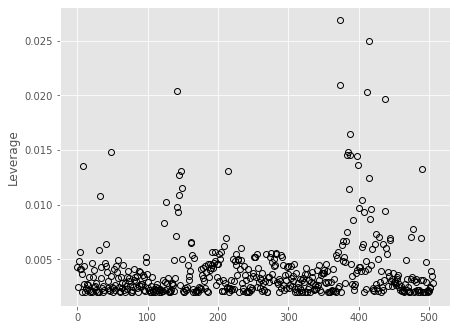

In [151]:
plt.figure(figsize = [7,5.5])
plt.plot(leverage, 'o' , c ='black' , mfc= 'none')
plt.ylabel('Leverage')
plt.show()

In [152]:
h = 2/len(boston_df)  # (1+p)/n

#any points that greatly exceed this value are high leverage points
print(h) # so anything above .7 -.8

0.003952569169960474


##Multiple Linear Regression

In [153]:
ml = sm.OLS(boston_df['MEDIAN_VALUE'] ,boston_df[['LSTAT' , 'AGE' , 'intercept']] )
mlr = ml.fit()

In [154]:
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:           MEDIAN_VALUE   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           2.98e-88
Time:                        16:21:18   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT         -1.0321      0.048    -21.416      0.0

In [155]:
ml = sm.OLS(boston_df['MEDIAN_VALUE'] ,boston_df.drop('MEDIAN_VALUE' , axis = 1) )
mlr = ml.fit()

In [156]:
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:           MEDIAN_VALUE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        16:21:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1080      0.033     -3.287      0.0

###R2 and RSE

In [157]:
print('R2 of the model is , ' ,mlr.rsquared)
print('RSE of the model is , ', np.sqrt(mlr.ssr/mlr.df_resid))

R2 of the model is ,  0.7406426641094095
RSE of the model is ,  4.7452981816996305


###VIF 

In [158]:
X = boston_df.drop('MEDIAN_VALUE', axis = 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], 
          index=X.columns)

CRIM           1.792192
ZN             2.298758
INDUS          3.991596
CHAS           1.073995
NOX            4.393720
RM             1.933744
AGE            3.100826
DIS            3.955945
RAD            7.484496
TAX            9.008554
PTRATIO        1.799084
B              1.348521
LSTAT          2.941491
intercept    585.265238
dtype: float64

###Interaction Terms

In [159]:
# I did try to not use the patsy formula till now, but for Interactions it is better to use the pasty 

In [160]:
ml_interaction = smf.ols('MEDIAN_VALUE ~ LSTAT*AGE' , data=  boston_df).fit()

In [161]:
print(ml_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:           MEDIAN_VALUE   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           4.86e-88
Time:                        16:21:18   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

Though the age is not significant but the interaction term is.

##Non- Linear Transformation of the predictors 

In [162]:
mlr_fit1 = smf.ols('MEDIAN_VALUE ~ LSTAT ' , data = boston_df).fit()
mlr_fit2 = smf.ols('MEDIAN_VALUE ~ LSTAT + np.power(LSTAT, 2)' , data = boston_df).fit()

In [163]:
print(mlr_fit1.summary())
print('='*75 ,end = '\n\n')
print(f'R2 - {mlr_fit1.rsquared} and MSE - {np.sqrt(mlr_fit1.ssr/mlr_fit1.df_resid)}')

                            OLS Regression Results                            
Dep. Variable:           MEDIAN_VALUE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           5.08e-88
Time:                        16:21:18   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [164]:
print(mlr_fit2.summary())
print('='*75 ,end = '\n\n')
print(f'R2 - {mlr_fit2.rsquared} and MSE - {np.sqrt(mlr_fit2.ssr/mlr_fit2.df_resid)}')

                            OLS Regression Results                            
Dep. Variable:           MEDIAN_VALUE   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          1.56e-112
Time:                        16:21:18   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0

In the 2nd case where we transformed the data , we see a higher R2 and smaller MSE plus the p value is nearly zero which makes the quadratic fit better

##ANOVA

The anova_lm function performs a hypothesis test comparing the two models, the null hypothesis is that the two model fit the data equally well, and the alternative hypothesis is that the full model is superior.

In [165]:
import statsmodels.api as sm
table = sm.stats.anova_lm(mlr_fit1 , mlr_fit2 )

In [166]:
table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


The F- Statistics is 135 and the pvalue is virtually 0, so it is very clear evidence against the null, so the model containg the lstat**2 is superior to the model that only contains lstat

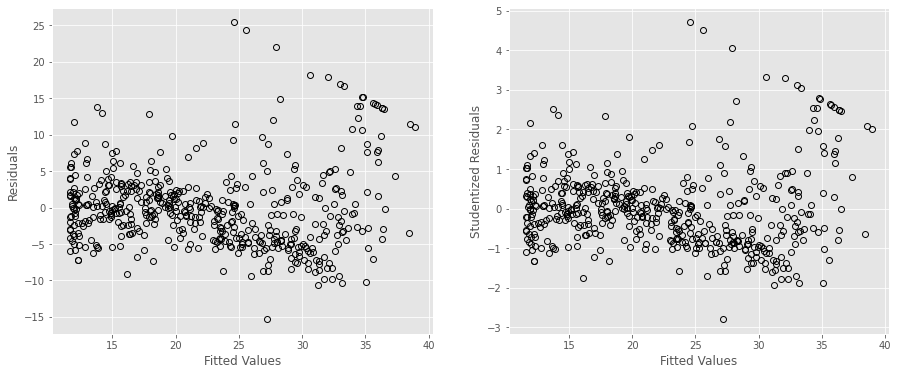

In [167]:
predict = mlr_fit2.fittedvalues

residuals = mlr_fit2.resid
student_resid = mlr_fit2.outlier_test().loc[:,'student_resid']
fig ,(ax1,ax2) = plt.subplots(1,2, figsize = [15,6])

ax1.plot(predict , residuals , 'o' ,color = 'black' ,mfc ='none' )
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax2.plot(predict ,student_resid , 'o' ,color = 'black' ,mfc ='none' )
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Studentized Residuals')

plt.show()

Now there is little to no patterns in the residual plots. Though there still are outliers. 

###5th order polynomial fit


In [168]:
def poly(pred, degree):
  """ function to give the polynomial terms to given degree"""
  list_1 = [f'np.power({pred}, {j})' for j in range(1,degree+1)]
  return '+'.join(list_1)

In [169]:
print(poly('LSTAT', 5))

np.power(LSTAT, 1)+np.power(LSTAT, 2)+np.power(LSTAT, 3)+np.power(LSTAT, 4)+np.power(LSTAT, 5)


In [170]:
for_ = 'MEDIAN_VALUE ~' + poly('LSTAT', 5)
mlr_5 = smf.ols(formula = for_ , data = boston_df).fit()

In [171]:
print(mlr_5.summary())

                            OLS Regression Results                            
Dep. Variable:           MEDIAN_VALUE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          8.73e-122
Time:                        16:21:19   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3

The coefs are different from R because there is collinearity between these predictors

###Log transformation

In [172]:
mlr_log = smf.ols('MEDIAN_VALUE ~ np.log(RM)' , data = boston_df ).fit()
print(mlr_log.summary())

                            OLS Regression Results                            
Dep. Variable:           MEDIAN_VALUE   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           1.22e-64
Time:                        16:21:19   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

##Qualitative predictors

In [173]:
carseats = pd.read_csv('/content/Carseats.csv')

In [174]:
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [175]:
print(carseats[['ShelveLoc']].head())

  ShelveLoc
0       Bad
1      Good
2    Medium
3    Medium
4       Bad


In [176]:
#https://stackoverflow.com/questions/22388498/statsmodels-linear-regression-patsy-formula-to-include-all-predictors-in-model
all_columns = "+".join(carseats.columns[1:])
for_ = 'Sales ~' + all_columns + '+ Income:Advertising + Price:Age'
ml_carseats = smf.ols(formula= for_, data = carseats).fit()
print(ml_carseats.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          6.14e-166
Time:                        16:21:19   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    